In [38]:
#make coordinant information understandable for the polygon
#the tuple value will be converted into x and y
#tuple[0] will be x, tuple[1] will be y for one specific point
from shapely.geometry import Point
#construct polygon, the output will contain the attribute "contains"
#to check if points are contained within the polygon
from shapely.geometry.polygon import Polygon
#use LinearRing to check if points was at the edge of polygon
from shapely.geometry.polygon import LinearRing
#handel input dataset
import pandas as pd
#export datasets into txt
import numpy as np

In [39]:
#test with small polygon first
point = Point(7,5)
polygon_points = [(1,1),(1,5),(10,5),(10,1)]
polygon = Polygon(polygon_points)
print(polygon.contains(point))

False


In [40]:
line = LineString(polygon_points)
print(line.contains(point))

True


In [44]:
#construct the multi-edge polygon
#the polygon has an non-zero-area,and this feature is used to test if a point is within a polygon
df = pd.read_csv('input_question_6_polygon',delim_whitespace=True,header = None)
#convert dataframe input into tuples of coordinants
polygon_points=list(df.itertuples(index=False, name=None))
polygon = Polygon(polygon_points)
#the following function stored the edge equations for the polygon
#so that we can check if the points are at the edge
#didn't use LineStrings function since we need the line bewteen the first and last indices
#the lines form a closed ring
line = LinearRing(polygon_points)
df2 = pd.read_csv('input_question_6_points',delim_whitespace=True,header = None)
#convert dataframe input into tuples of coordinants
test_points=list(df2.itertuples(index=False, name=None))

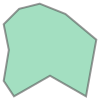

In [45]:
polygon

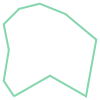

In [46]:
line

In [47]:
output_array = []
for m,n in test_points:
    #make coordinant information understandable for the polygon
    #the tuple value will be converted into x and y
    #tuple[0] will be x, tuple[1] will be y for one specific point
    point = Point(m,n)
    #if the points was within the polygon or at the edge
    #mark it as inside
    if polygon.contains(point) or line.contains(point):
        output_array.append([m,n,'inside'])
    #otherwise mark as outside
    else:
        output_array.append([m,n,'outside'])
output_array

[[7, 11, 'inside'],
 [10, 14, 'inside'],
 [11, 4, 'outside'],
 [12, 21, 'outside'],
 [16, 3, 'outside'],
 [16, 10, 'inside'],
 [17, 4, 'inside'],
 [18, 7, 'inside'],
 [18, 17, 'outside'],
 [20, 7, 'outside']]

In [48]:
np.savetxt('output_question_6.txt',output_array,fmt='%s')